### 1. Importing Important Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import cv2
import re
import PIL

from pytesseract import Output
from pdf2image import convert_from_path
from PIL import Image

### 2. Path Of Document

In [2]:
input_doc = r'E:/DATA TRAINED/Pinnacle Assignment/pinnacle_inv_3300004000.pdf'

### 3. Convert PDF to Image And Store The Image

In [3]:
input_sample = convert_from_path(input_doc,350,poppler_path=r'C:/Users/Rohit Kachhal/poppler-0.68.0/bin')

i = 1
for j in input_sample:
    file_name = "Invoice_" + str(i) + ".jpg"
    j.save(file_name, "JPEG")
    i = i+1

### 4. Read And Display The Image Using Open CV

In [4]:
jpg_image = cv2.imread("Invoice_1.jpg")

imgResize = cv2.resize(jpg_image,(900,650))
cv2.imshow('Resize image',imgResize)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 5. Applying Threshold To Make Image More Readable

In [5]:
_, result = cv2.threshold(jpg_image,120,255,cv2.THRESH_BINARY)

imgResize = cv2.resize(jpg_image,(900,650))
cv2.imshow('image',imgResize)
imgResize_1 = cv2.resize(result,(900,650))
cv2.imshow('result',imgResize_1)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 6. Text From Image

In [6]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\Rohit Kachhal\AppData\Local\Tesseract-OCR\tesseract.exe'
custom_config = r'--oem 3 --psm 6'
img_text = pytesseract.image_to_string(jpg_image,config=custom_config)
print(img_text)

=aiir ATOMY LIVING IF COMPANY
Bill To: Invoice,
PINNACLE SOLUTIONS Invoice : 0380
21747 BERTRAM ROAD Date: 03/01/2020
SAN JOSE 95120 P. Order #: 3300004000
CA Terms: 30 days
Attn = :Mr. Smith
Description Amount
Being supply of skilled labor, tools and equipments for grease trap desludging by means of
vacuum desludging tanker and sewage effluent sampling (sewerage treatment service)
for the month of Jan. 2020. USD 10,300.00
(Our D/O No. 3046)

Sub total - USD 10,300.00
eee ecm ==) c ora Dt Mmmecomee w= C8210) 2 010
—  — —RM_10,300.00
USD TEN Thousand Three Hundred And 0 Cents.

Authorized Signature
=
Mail Add.: 885, Central Parkway 78323 Texas
Email: inquiry@if.com



### 7. Boundary Of Each Character

In [7]:
h, w, _ = jpg_image.shape
boxes = pytesseract.image_to_boxes(jpg_image,config=custom_config) 
for b in boxes.splitlines():
    b = b.split(' ')
    imge = cv2.rectangle(jpg_image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
print(boxes)    

= 486 3816 622 3827 0
a 468 3741 731 3813 0
i 669 3741 742 3827 0
i 744 3746 766 3812 0
r 780 3746 816 3812 0
A 942 3757 1016 3860 0
T 1025 3757 1095 3860 0
O 1101 3754 1174 3862 0
M 1188 3757 1263 3860 0
Y 1272 3757 1337 3860 0
L 1382 3757 1439 3860 0
I 1449 3757 1459 3860 0
V 1471 3757 1547 3860 0
I 1560 3757 1570 3860 0
N 1587 3757 1652 3860 0
G 1665 3754 1730 3862 0
I 1779 3757 1789 3860 0
F 1807 3757 1856 3860 0
C 1901 3754 2049 3862 0
O 2034 3754 2096 3863 0
M 2063 3757 2138 3860 0
P 2152 3757 2219 3863 0
A 2223 3757 2297 3860 0
N 2312 3757 2377 3860 0
Y 2387 3757 2452 3860 0
B 368 3438 397 3476 0
i 384 3438 406 3478 0
l 405 3439 428 3478 0
l 433 3439 442 3478 0
T 457 3439 488 3476 0
o 490 3439 515 3466 0
: 520 3439 527 3466 0
I 2322 3444 2342 3489 0
n 2347 3446 2376 3476 0
v 2378 3446 2408 3476 0
o 2396 3444 2423 3490 0
i 2411 3446 2438 3477 0
c 2443 3446 2457 3490 0
e 2460 3446 2511 3478 0
, 2524 3444 2526 3449 0
P 369 3333 394 3367 0
I 398 3333 405 3367 0
N 410 3333 436 3367 0

### 8. Marking Boundary Of Each Character Into Image

In [8]:
imgResize = cv2.resize(jpg_image,(900,650))
cv2.imshow('Resize image',imgResize)
cv2.waitKey(0)
cv2.destroyAllWindows()

#plt.figure(figsize=(15,25))
#plt.imshow(imge)

### 9. Fixed The Boundary Of Each Word

In [9]:
d = pytesseract.image_to_data(jpg_image,config=custom_config,output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


### 10. Marking Boundary Of Each Word Into Image

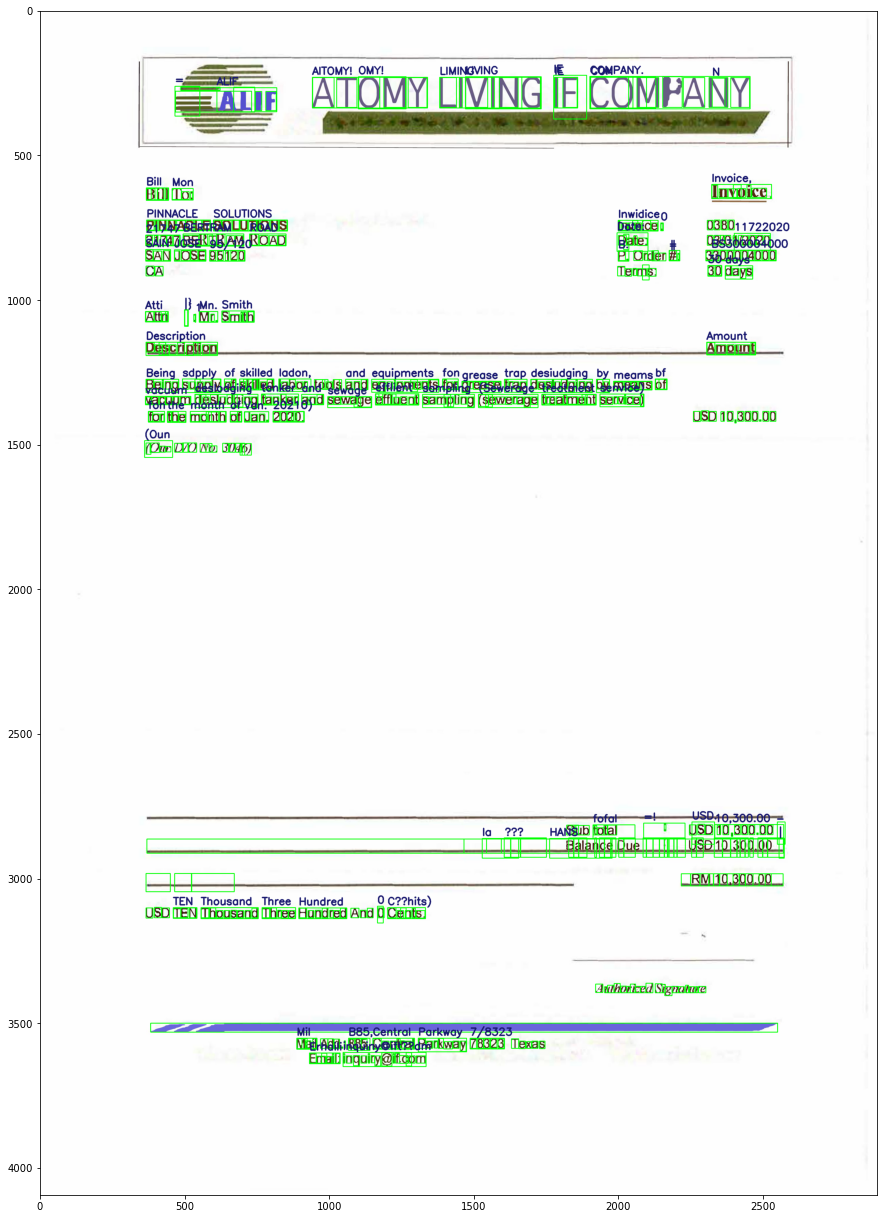

In [10]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(float(d['conf'][i])) > 20:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(jpg_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        img = cv2.putText(img,d['text'][i],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,1.2,(25,25,112),3)

imgResize = cv2.resize(img,(900,650))
cv2.imshow('Resize image',imgResize)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.figure(figsize=(15,25))
plt.imshow(img)

### 11. Based On Regular Expression Match Pattern From Image

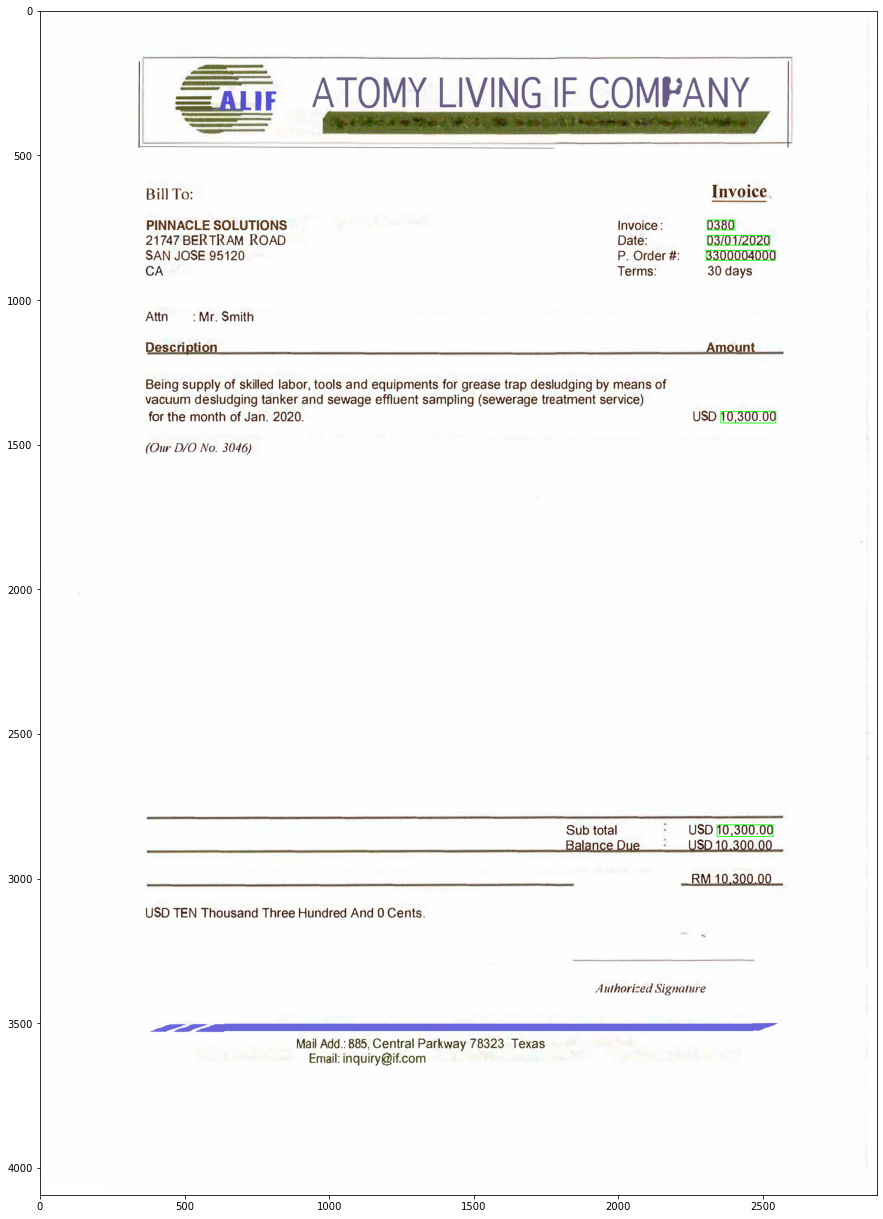

In [11]:
new_img = cv2.imread("Invoice_1.jpg")
d = pytesseract.image_to_data(new_img, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = '^(0[1-9]|1[0-2])/(0[1-9]|[12][0-9]|3[01])/(19|20)\d\d$'
invoice_pattern = '\d{4}$'
po_pattern = '\d{10}$'
term_pattern = '([0-9]|0[1-9]|[12][0-9]|3[01])\s+\w\w\w\w$'
pay_pattern = '\d{2},\d{3}.\d{2}'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(float(d['conf'][i])) > 60:
        if re.match(date_pattern, d['text'][i]):
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(new_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    if int(float(d['conf'][i])) > 60:
        if re.match(invoice_pattern, d['text'][i]):
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(new_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            
    if int(float(d['conf'][i])) > 60:
        if re.match(po_pattern, d['text'][i]):
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(new_img, (x, y), (x + w, y + h), (0, 255, 0), 2)   
            
    if int(float(d['conf'][i])) > 35:
        if re.match(term_pattern, d['text'][i]):
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(new_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
          
    if int(float(d['conf'][i])) > 35:
        if re.match(pay_pattern, d['text'][i]):
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(new_img, (x, y), (x + w, y + h), (0, 255, 0), 2)    
imgResize = cv2.resize(img,(900,650))
cv2.imshow('Resize image',imgResize)
cv2.waitKey(0)
cv2.destroyAllWindows()   
plt.figure(figsize=(15,25))
plt.imshow(img)  